In [1]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(10, 784)
(10, 10)


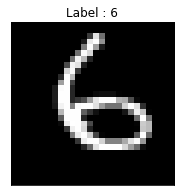

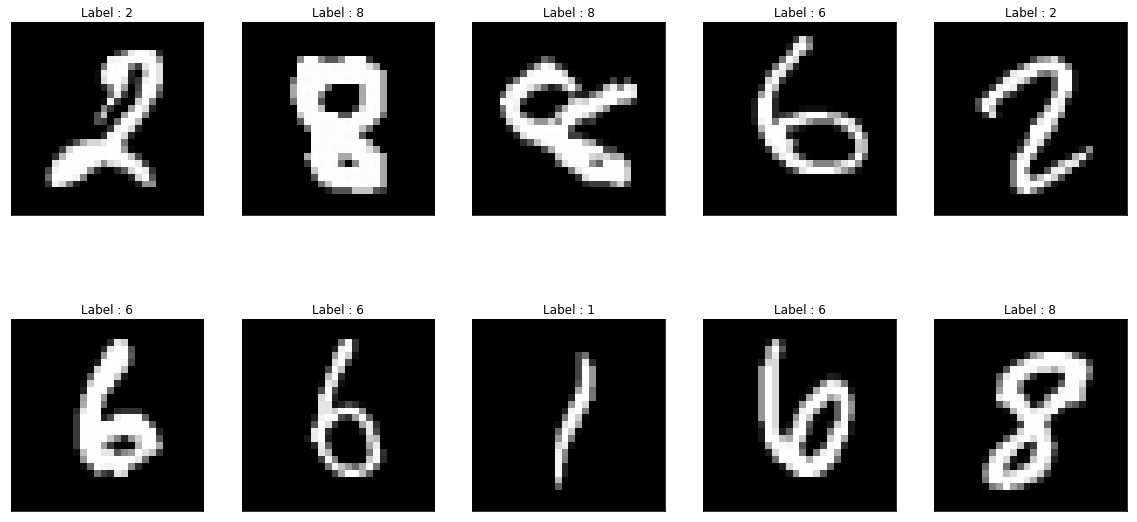

In [3]:
train_x, train_y = mnist.train.next_batch(10) # mnist.train training set
img = train_x[3,:].reshape(28,28)

print(train_x.shape)
print(train_y.shape)
plt.figure(figsize=(5,3))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[3])))
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(20, 10))
for i in range(10):    
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i, :].reshape(28, 28), 'gray')
    plt.title("Label : {}".format(np.argmax(train_y[i])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

# 학습하기 전. input output pair를 나타냈을 뿐

In [4]:
print ('Train labels : {}'.format(train_y[3, :]))

Train labels : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [5]:
# number of node
n_input = 28*28 # 784개의 node로 batch
n_hidden1 = 100 
n_output = 10   # 10개의 숫자 중에서 가장 높은 index를 고르기 위함.

In [6]:
# lnitialization (normal distribuiton)
weights = {
    #input layer에서 hidden layer로 진행할때, weights 748*100 개 
    'hidden1' : tf.Variable(tf.random_normal([n_input, n_hidden1], stddev = 0.1)),
    #hidden layer에서 output layer로 진행할때, weights 100*10 개
    'output' : tf.Variable(tf.random_normal([n_hidden1, n_output], stddev = 0.1)),  
}

biases = {
    # hidden layer의 각각의 node에 대한 bias
    'hidden1' : tf.Variable(tf.random_normal([n_hidden1], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1)),
}


#input output 자리설정
x = tf.placeholder(tf.float32, [None, n_input])  
y = tf.placeholder(tf.float32, [None, n_output]) 
# batch size만큼 가져올건데 ,아직 정의 안 해서 None
# 그러면 나중에 알아서 scale맞춘다.

In [7]:
# Define Network
def build_model(x, weights, biases):
    # first hidden layer  (noneX784) * (784X100) + (100, ) n= 100
    hidden1 = tf.add(tf.matmul(x, weights['hidden1']), biases['hidden1'])
    # non linear activate function -> ReLu
    hidden1 = tf.nn.relu(hidden1)
    
    # Output layer with linear activation  (none x100) * (100 X 10) + (10, )
    output = tf.add(tf.matmul(hidden1, weights['output']), biases['output'])
    return output

print()
# placeholder에서 x는 가져올거고 
# w, b는 아직 껍데기만 만들어놓은 거, 아직 아무것도 된 게 없음

In [8]:
# Define Cost cross entropy
pred = build_model(x, weights, biases) # predicted values
loss = tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(loss) 
# batch로 가져와서 loss가 많을테니까 평균을 가져오겠다 -> reduce_mean

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
LR = 0.0001
optm = tf.train.AdamOptimizer(LR).minimize(loss)

init = tf.global_variables_initializer()

print(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Tensor("Mean:0", shape=(), dtype=float32)


In [9]:
# iteration Configuration 

n_batch = 50     # Batch Size
n_iter = 2500    # Learning Iteration
n_prt = 250      # Print Cycle

In [10]:
# Run initialize
# config = tf.ConfigProto(allow_soft_placement=True)  # GPU Allocating policy
# sess = tf.Session(config=config)
sess = tf.Session()   #session
sess.run(init)     # session run

# Training cycle
for epoch in range(n_iter):
    train_x, train_y = mnist.train.next_batch(n_batch) # 50개 씩
    sess.run(optm, feed_dict={x: train_x,  y: train_y}) # x, y를 feed해주어야함
    
    if epoch % n_prt == 0:
        c = sess.run(loss, feed_dict={x : train_x,  y : train_y})
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))

Iter : 0
Cost : 2.5100297927856445
Iter : 250
Cost : 1.2493906021118164
Iter : 500
Cost : 0.768044114112854
Iter : 750
Cost : 0.5351497530937195
Iter : 1000
Cost : 0.5475584864616394
Iter : 1250
Cost : 0.49282515048980713
Iter : 1500
Cost : 0.3731633424758911
Iter : 1750
Cost : 0.35007256269454956
Iter : 2000
Cost : 0.549043595790863
Iter : 2250
Cost : 0.39232197403907776


In [11]:
# Test or Evaluation

test_x, test_y = mnist.test.next_batch(100)  # 100개

# 각각의 batch마다 가장 index가 digit인 거임
my_pred = sess.run(pred, feed_dict={x : test_x})
my_pred = np.argmax(my_pred, axis=1) 


labels = np.argmax(test_y, axis=1)
accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}%".format(accr*100))

Accuracy : 95.0%


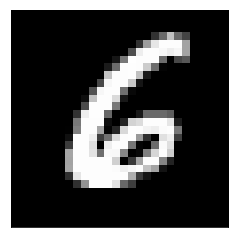

Prediction : 6
Output : [ 1.   -6.78  0.49 -4.74 -0.36  0.97  7.31 -7.52  0.19 -3.57]
Output_ReLu : [1.   0.   0.49 0.   0.   0.97 7.31 0.   0.19 0.  ]
Probability : [0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.  ]


In [13]:
test_x, test_y = mnist.test.next_batch(1)    # 한 개 샘플 
output = sess.run(pred, feed_dict={x : test_x})
output_relu = sess.run(tf.nn.relu(pred), feed_dict={x : test_x})
logits = sess.run(tf.nn.softmax(pred), feed_dict={x : test_x}) # 마지막 output에 softmax를 취해주면 확률처럼 표현되겠지?
predict = np.argmax(logits)

plt.imshow(test_x.reshape(28,28), 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

print('Prediction : {}'.format(predict))
np.set_printoptions(precision=2, suppress=True)
print('Output : {}'.format(output.ravel()))
print('Output_ReLu : {}'.format(output_relu.ravel()))
print('Probability : {}'.format(logits.ravel())) # ravel 1행으로 늘어서게 만드는.. 